<a href="https://colab.research.google.com/github/BrainConnection/Quantum_Algorithm/blob/main/7.%2012Q%20TFIM%20VQE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-algorithms
!pip install qiskit-aer

!pip install scipy
!pip install matplotlib

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

# Hamiltonian Diagonalization

$$ H = -(1-g) Σ Z_j Z_{j+1} -g Σ X_j  $$

1D 5 Qubit System

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(11)] + [bias for _ in range(12)]
operator_list = ["ZZIIIIIIIIII", "IZZIIIIIIIII", "IIZZIIIIIIII", "IIIZZIIIIIII",
                 "IIIIZZIIIIII", "IIIIIZZIIIII", "IIIIIIZZIIII", "IIIIIIIZZIII",
                 "IIIIIIIIZZII", "IIIIIIIIIZZI", "IIIIIIIIIIZZ",
                 "XIIIIIIIIIII", "IXIIIIIIIIII", "IIXIIIIIIIII", "IIIXIIIIIIII",
                 "IIIIXIIIIIII", "IIIIIXIIIIII", "IIIIIIXIIIII", "IIIIIIIXIIII",
                 "IIIIIIIIXIII", "IIIIIIIIIXII", "IIIIIIIIIIXI", "IIIIIIIIIIIX"]
hamiltonian_list = []
for i in range(23):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-14.92597110990912

# VQE in Exact Simulator

scipy minimize

## Function Definition

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator

import numpy as np
from scipy.optimize import minimize

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(11)] + [bias for _ in range(12)]
operator_list = ["ZZIIIIIIIIII", "IZZIIIIIIIII", "IIZZIIIIIIII", "IIIZZIIIIIII",
                 "IIIIZZIIIIII", "IIIIIZZIIIII", "IIIIIIZZIIII", "IIIIIIIZZIII",
                 "IIIIIIIIZZII", "IIIIIIIIIZZI", "IIIIIIIIIIZZ",
                 "XIIIIIIIIIII", "IXIIIIIIIIII", "IIXIIIIIIIII", "IIIXIIIIIIII",
                 "IIIIXIIIIIII", "IIIIIXIIIIII", "IIIIIIXIIIII", "IIIIIIIXIIII",
                 "IIIIIIIIXIII", "IIIIIIIIIXII", "IIIIIIIIIIXI", "IIIIIIIIIIIX"]
hamiltonian_list = []
for i in range(23):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

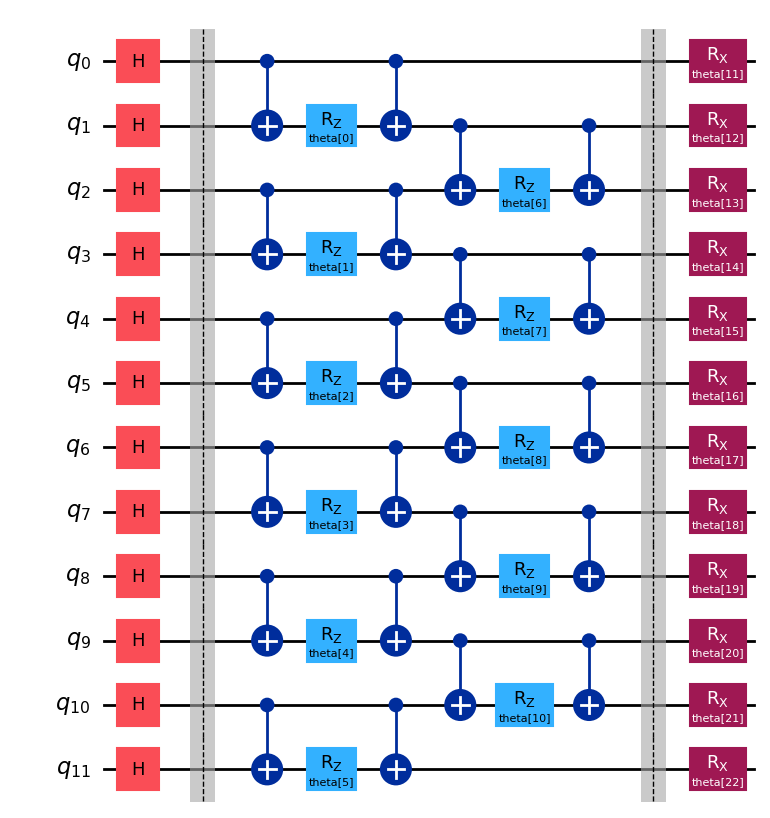

In [ ]:
# Ansatz

ansatz = QuantumCircuit(12)
params = ParameterVector("theta", length=23)
it = iter(params)
ansatz.h(range(0,12))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(4, 5)
ansatz.cx(6, 7)
ansatz.cx(8, 9)
ansatz.cx(10, 11)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.rz(next(it), 5)
ansatz.rz(next(it), 7)
ansatz.rz(next(it), 9)
ansatz.rz(next(it), 11)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(4, 5)
ansatz.cx(6, 7)
ansatz.cx(8, 9)
ansatz.cx(10, 11)

ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.cx(5, 6)
ansatz.cx(7, 8)
ansatz.cx(9, 10)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.rz(next(it), 6)
ansatz.rz(next(it), 8)
ansatz.rz(next(it), 10)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.cx(5, 6)
ansatz.cx(7, 8)
ansatz.cx(9, 10)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.rx(next(it), 5)
ansatz.rx(next(it), 6)
ansatz.rx(next(it), 7)
ansatz.rx(next(it), 8)
ansatz.rx(next(it), 9)
ansatz.rx(next(it), 10)
ansatz.rx(next(it), 11)

ansatz.draw("mpl")

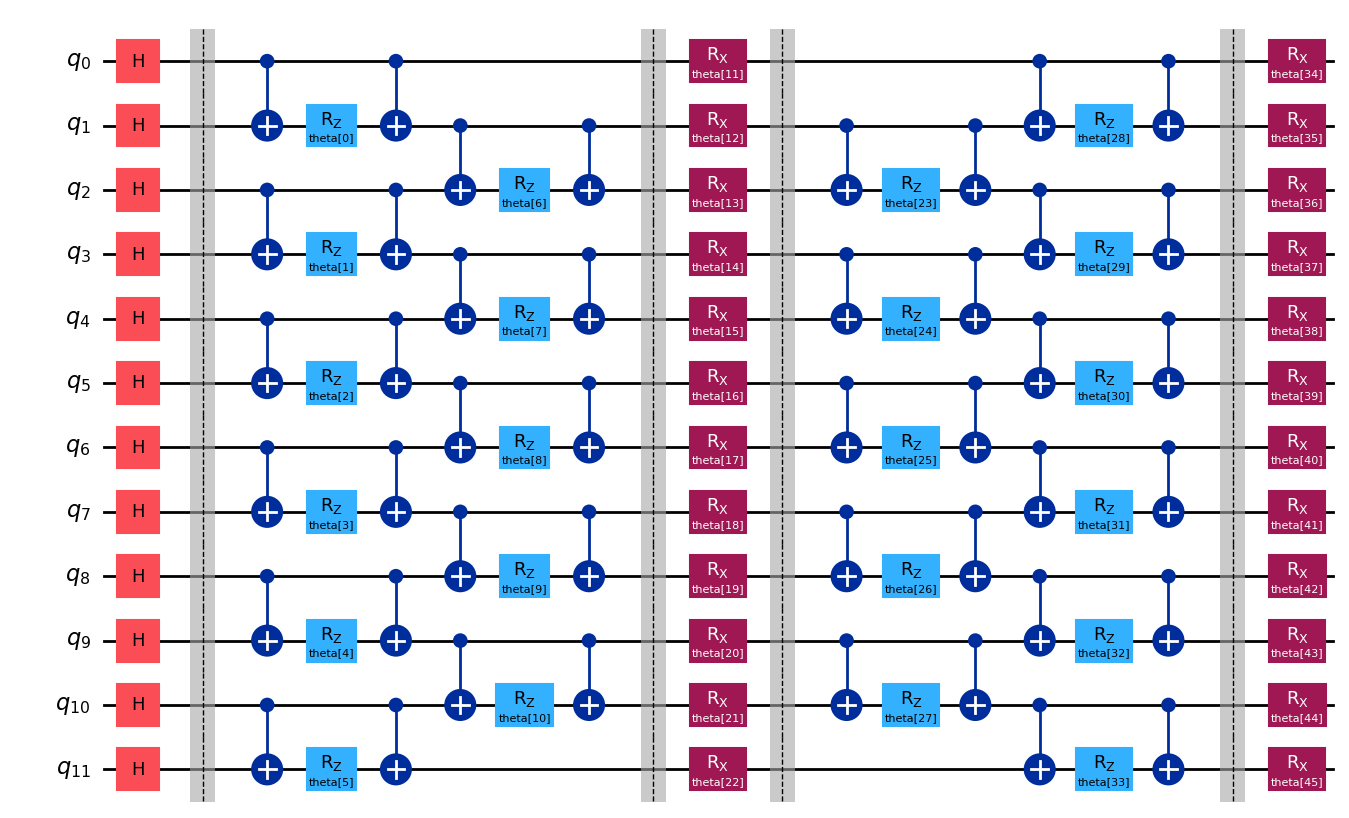

In [ ]:
# Ansatz_deep

ansatzd = QuantumCircuit(12)
params = ParameterVector("theta", length=46)
it = iter(params)
ansatzd.h(range(0,12))

ansatzd.barrier()

ansatzd.cx(0, 1)
ansatzd.cx(2, 3)
ansatzd.cx(4, 5)
ansatzd.cx(6, 7)
ansatzd.cx(8, 9)
ansatzd.cx(10, 11)
ansatzd.rz(next(it), 1)
ansatzd.rz(next(it), 3)
ansatzd.rz(next(it), 5)
ansatzd.rz(next(it), 7)
ansatzd.rz(next(it), 9)
ansatzd.rz(next(it), 11)
ansatzd.cx(0, 1)
ansatzd.cx(2, 3)
ansatzd.cx(4, 5)
ansatzd.cx(6, 7)
ansatzd.cx(8, 9)
ansatzd.cx(10, 11)

ansatzd.cx(1, 2)
ansatzd.cx(3, 4)
ansatzd.cx(5, 6)
ansatzd.cx(7, 8)
ansatzd.cx(9, 10)
ansatzd.rz(next(it), 2)
ansatzd.rz(next(it), 4)
ansatzd.rz(next(it), 6)
ansatzd.rz(next(it), 8)
ansatzd.rz(next(it), 10)
ansatzd.cx(1, 2)
ansatzd.cx(3, 4)
ansatzd.cx(5, 6)
ansatzd.cx(7, 8)
ansatzd.cx(9, 10)

ansatzd.barrier()

ansatzd.rx(next(it), 0)
ansatzd.rx(next(it), 1)
ansatzd.rx(next(it), 2)
ansatzd.rx(next(it), 3)
ansatzd.rx(next(it), 4)
ansatzd.rx(next(it), 5)
ansatzd.rx(next(it), 6)
ansatzd.rx(next(it), 7)
ansatzd.rx(next(it), 8)
ansatzd.rx(next(it), 9)
ansatzd.rx(next(it), 10)
ansatzd.rx(next(it), 11)

ansatzd.barrier()

ansatzd.cx(1, 2)
ansatzd.cx(3, 4)
ansatzd.cx(5, 6)
ansatzd.cx(7, 8)
ansatzd.cx(9, 10)
ansatzd.rz(next(it), 2)
ansatzd.rz(next(it), 4)
ansatzd.rz(next(it), 6)
ansatzd.rz(next(it), 8)
ansatzd.rz(next(it), 10)
ansatzd.cx(1, 2)
ansatzd.cx(3, 4)
ansatzd.cx(5, 6)
ansatzd.cx(7, 8)
ansatzd.cx(9, 10)

ansatzd.cx(0, 1)
ansatzd.cx(2, 3)
ansatzd.cx(4, 5)
ansatzd.cx(6, 7)
ansatzd.cx(8, 9)
ansatzd.cx(10, 11)
ansatzd.rz(next(it), 1)
ansatzd.rz(next(it), 3)
ansatzd.rz(next(it), 5)
ansatzd.rz(next(it), 7)
ansatzd.rz(next(it), 9)
ansatzd.rz(next(it), 11)
ansatzd.cx(0, 1)
ansatzd.cx(2, 3)
ansatzd.cx(4, 5)
ansatzd.cx(6, 7)
ansatzd.cx(8, 9)
ansatzd.cx(10, 11)

ansatzd.barrier()

ansatzd.rx(next(it), 0)
ansatzd.rx(next(it), 1)
ansatzd.rx(next(it), 2)
ansatzd.rx(next(it), 3)
ansatzd.rx(next(it), 4)
ansatzd.rx(next(it), 5)
ansatzd.rx(next(it), 6)
ansatzd.rx(next(it), 7)
ansatzd.rx(next(it), 8)
ansatzd.rx(next(it), 9)
ansatzd.rx(next(it), 10)
ansatzd.rx(next(it), 11)

ansatzd.draw("mpl")

In [ ]:
# Estimator

estimator = Estimator()

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result()
    return cost.values[0]

In [ ]:
def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Finding Seed of np.random.seed

In [ ]:
local_minimum_list = []
#seed_list = []

for k in range(50):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(23)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

Optimization terminated successfully.
         Current function value: -9.760508
         Iterations: 28
         Function evaluations: 720
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: -9.685603
         Iterations: 27
         Function evaluations: 672
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: -12.014575
         Iterations: 37
         Function evaluations: 984
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: -14.321977
         Iterations: 47
         Function evaluations: 1272
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: -11.942713
         Iterations: 38
         Function evaluations: 960
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: -11.942713
         Iterations: 42
         Function ev

In [ ]:
local_minimum_list

In [ ]:
np.min(local_minimum_list)

-14.321977279913341

[-9.760507984520443,
 -9.685602823197275,
 -12.014574607083494,
 -14.321977279803772,
 -11.9427130794128,
 -11.942713079247005,
 -12.12076134512958,
 -12.012013228493135,
 -12.01457460717555,
 -12.014216917738779,
 -14.321977279909946,
 -9.685602823336914,
 -14.321977279910687,
 -12.014216917768936,
 -11.954983978323966,
 -14.321977279850966,
 -9.760507984618577,
 -12.014216917756016,
 -11.954983978182417,
 -9.937741326865423,
 -12.112350999762903,
 -12.014216917705536,
 -12.112350999740954,
 -11.840375489665478,
 -12.014216917548339,
 -11.978671152940066,
 -12.012013228513835,
 -14.321977279892113,
 -11.735813019244416,
 -12.112350999788077,
 -11.837679542915987,
 -14.321977279885786,
 -11.841739797866271,
 -12.01201322840784,
 -9.492750812431126,
 -12.012013228288081,
 -14.321977279643834,
 -11.841739797741397,
 -12.112350999799384,
 -9.760507984388765,
 -11.84037548966155,
 -12.11235099975579,
 -12.012013228408719,
 -9.937741326936058,
 -12.120761345113793,
 -9.937741326926918,
 -9.6264485444187,
 -11.840375489651237,
 -11.837679542948036,
 -9.538536394765408,]

 -14.321977279913341

In [ ]:
local_minimum_list = []
#seed_list = []

for k in range(50):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(k)
  x0 = 2 * np.pi * np.random.random(46)

  callback = build_callback(ansatzd, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatzd, hamiltonian, estimator),
    method="bfgs",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])

Optimization terminated successfully.
         Current function value: -14.722222
         Iterations: 277
         Function evaluations: 13630
         Gradient evaluations: 290
Optimization terminated successfully.
         Current function value: -13.279356
         Iterations: 467
         Function evaluations: 23500
         Gradient evaluations: 500
Optimization terminated successfully.
         Current function value: -13.271497
         Iterations: 207
         Function evaluations: 10152
         Gradient evaluations: 216
Optimization terminated successfully.
         Current function value: -13.130359
         Iterations: 440
         Function evaluations: 21667
         Gradient evaluations: 461
Optimization terminated successfully.
         Current function value: -13.279356
         Iterations: 381
         Function evaluations: 18612
         Gradient evaluations: 396
Optimization terminated successfully.
         Current function value: -13.366800
         Iterations: 27

KeyboardInterrupt: 

In [ ]:
local_minimum_list

In [ ]:
np.min(local_minimum_list)

-14.722221567958655

[-14.72222156774964,
 -13.126787771159645,
 -13.130358795711562,
 -13.278782467718893,
 -14.722221568038059,
 -14.722221568053138,
 -13.279356062297127,
 -13.124238453031394,
 -13.126787771371077,
 -14.722221567187805,
 -13.366799683822334,
 -13.126787627426689,
 -13.130359019968118,
 -13.271497106925223,
 -14.722221568168832,
 -14.72222125745081,
 -13.366799812672372,
 -14.722221567321053,
 -13.366799812645755, -14.722221567926821,
 -13.279356063085078,
 -13.271497106706022,
 -13.13035902021536,
 -13.279356062848745,
 -13.366799809040133,
 -14.722221533324825,
 -13.27149549258876,
 -13.279355682653547,
 -13.36679981195983,
 -13.126787121503634,
 -13.126787771914682,
 -13.22674674142189,
 -13.36679972051692,
 -13.366799812571056,
 -14.722221567839448,
 -14.722131049272488,
 -13.366799812484937,
 -13.124238453120332,
 -13.126787771388253,
 -13.271497104498748,
 -13.366799812661386,
 -13.124238452973998,
 -13.12423845299528,
 -14.722221567141489,
 -14.722221567958655,
 -13.130358566516062,
 -14.722221566290449,
 -13.27149710651061,
 -14.722221567167843,
 -14.722221567652772]

 -14.722221568168832

# VQE in Noisy Simulator (Trial)

scipy minimize method trial ("cobyla", "bfsd", "slsqp")

## Function Definition

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

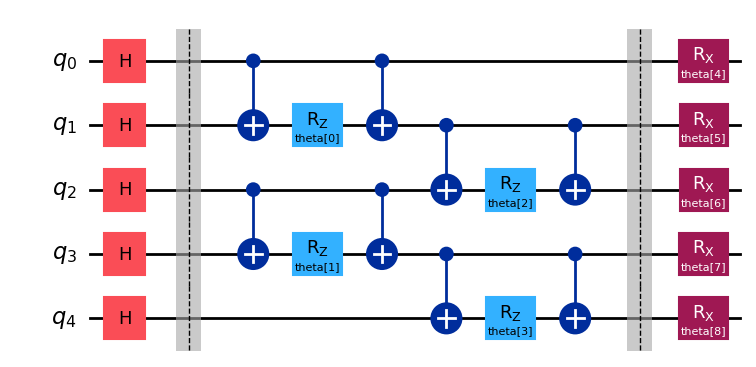

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05
cx_depolarizing_prob = 0.02


# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

noise_model.add_all_qubit_quantum_error(error_reset, "reset")
noise_model.add_all_qubit_quantum_error(error_meas, "measure")
noise_model.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'cx', 'measure', 'u1', 'reset', 'u2']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result()
    return cost.values[0]

In [ ]:
def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

## Minimizing Method Trial

COBYLA, SLSQP, BFGS

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(5)
x0 = 2 * np.pi * np.random.random(9)

x0

array([1.39482423, 5.47097243, 1.29885476, 5.77180256, 3.06877801,
       3.84370005, 4.81234099, 3.25731628, 1.86485255])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="cobyla",
  callback=callback,
)

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.833984375
       x: [-1.772e-01  6.251e+00  4.286e-01  6.645e+00  2.471e+00
            5.300e+00  5.802e+00  2.812e+00  1.528e+00]
    nfev: 105
   maxcv: 0.0

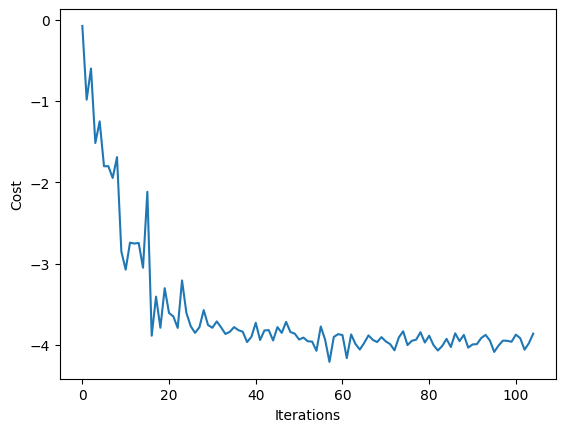

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="SLSQP",
  callback=callback,
)

In [ ]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.490234375
       x: [-7.691e+05  9.834e+06  1.536e+07 -5.090e+06 -1.904e+07
            3.058e+07  2.420e+07 -1.903e+07  1.292e+07]
     nit: 46
     jac: [ 1.717e+07  7.602e+06  1.075e+07  1.363e+07  1.337e+07
            1.206e+07  1.901e+07  1.049e+07  1.835e+06]
    nfev: 921
    njev: 46

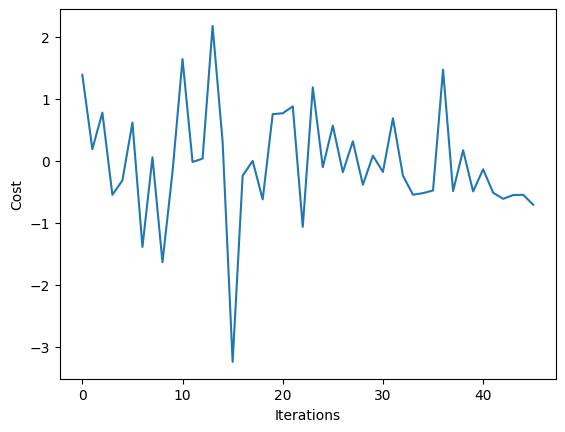

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(1)
x0 = 2 * np.pi * np.random.random(9)

x0

array([2.62022653e+00, 4.52593227e+00, 7.18638172e-04, 1.89961158e+00,
       9.22094457e-01, 5.80180502e-01, 1.17030742e+00, 2.17122208e+00,
       2.49296356e+00])

In [ ]:
callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)
res = minimize(
  cost_func_vqe,
  x0,
  args=(ansatz, hamiltonian, estimator),
  method="BFGS",
  callback=callback,
)

In [ ]:
res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.837890625
        x: [ 2.620e+00  4.526e+00  7.186e-04  1.900e+00  9.221e-01
             5.802e-01  1.170e+00  2.171e+00  2.493e+00]
      nit: 1
      jac: [ 5.898e+06 -7.995e+06  1.324e+07  7.340e+06  3.932e+06
             4.063e+06 -1.835e+06 -9.961e+06  1.704e+06]
 hess_inv: [[ 1.219e+00 -9.976e-03 ...  1.791e-02  1.384e-01]
            [-9.976e-03  7.765e-01 ... -3.035e-01 -6.494e-02]
            ...
            [ 1.791e-02 -3.035e-01 ...  5.923e-01 -6.794e-02]
            [ 1.384e-01 -6.494e-02 ... -6.794e-02  1.072e+00]]
     nfev: 221
     njev: 21

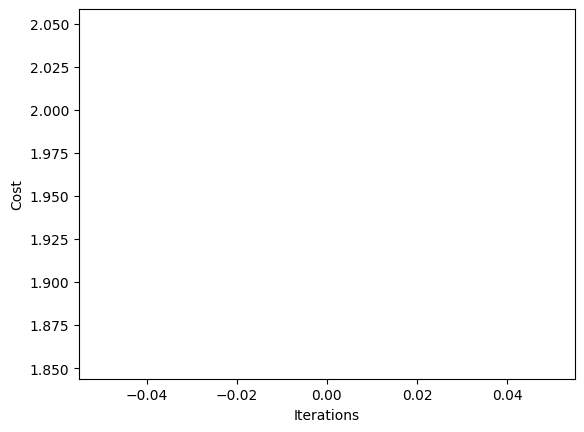

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
plt.draw()

# VQE in Noisy Simulator (Various types of error)

scipy minimize method "cobyla"

## Function Setting

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

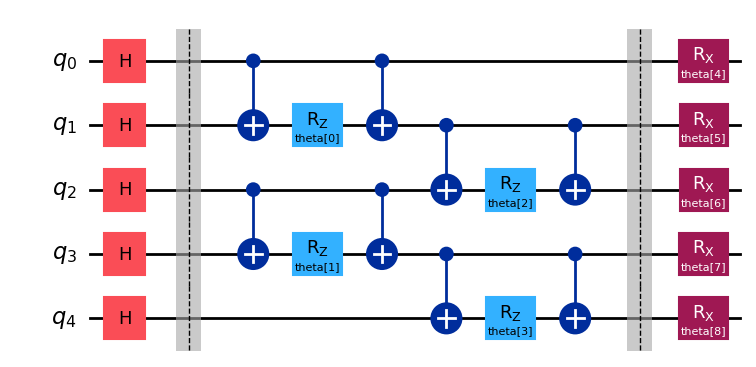

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

In [ ]:
seed_list = [1,   4,   5,   6,   7,   8,  10,  11,  12,  13,
14,  15,  17,  18,  19,  20,  21,  23,  24,  25,
27,  28,  29,  30,  31,  34,  36,  38,  39,  40,
41,  42,  43,  45,  46,  47,  48,  49,  51,  52,
55,  59,  61,  63,  65,  66,  67,  68,  70,  71,
74,  75,  76,  77,  78,  81,  86,  87,  90,  93,
95,  96,  97,  101, 102, 103, 104, 105, 106, 107,
112, 113, 114, 116, 118, 121, 124, 126, 127, 128,
132, 133, 135, 136, 137, 138, 139, 140, 141, 142,
144, 147, 148, 149, 150, 151, 152, 154, 155, 162,
165, 166, 169, 171, 172, 174]

## Ideal Simulator

In [ ]:
noise_model = NoiseModel()

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
mean_ideal = np.mean(local_minimum_list)
var_ideal = np.var(local_minimum_list)
max_ideal = np.max(local_minimum_list)
min_ideal = np.min(local_minimum_list)

print("mean : {0}".format(mean_ideal))
print("variance : {0}".format(var_ideal))
print("maximum : {0}".format(max_ideal))
print("minimum : {0}".format(min_ideal))
print()
print(local_minimum_list)

mean : -5.783564453125
variance : 0.007575407600402833
maximum : -5.5791015625
minimum : -5.898681640625

[-5.66845703 -5.86987305 -5.69555664 -5.85449219 -5.88012695 -5.89672852
 -5.69189453 -5.67260742 -5.87280273 -5.74780273 -5.83886719 -5.89379883
 -5.84790039 -5.68261719 -5.68017578 -5.88769531 -5.74804688 -5.84472656
 -5.75732422 -5.84521484 -5.89794922 -5.8605957  -5.80004883 -5.62597656
 -5.6184082  -5.82568359 -5.63647461 -5.73828125 -5.85913086 -5.80078125
 -5.86987305 -5.58251953 -5.84619141 -5.68579102 -5.83862305 -5.57910156
 -5.78735352 -5.64453125 -5.8762207  -5.75537109 -5.67797852 -5.70263672
 -5.80859375 -5.7109375  -5.74365234 -5.89282227 -5.88354492 -5.86621094
 -5.85229492 -5.859375   -5.80444336 -5.83349609 -5.74536133 -5.87084961
 -5.796875   -5.87280273 -5.70019531 -5.76074219 -5.87133789 -5.6940918
 -5.58813477 -5.87353516 -5.87573242 -5.69848633 -5.77709961 -5.77050781
 -5.82519531 -5.59399414 -5.875      -5.7355957  -5.81762695 -5.69970703
 -5.89868164 -5.801

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

np.random.seed(seed_list[72])
x0 = 2 * np.pi * np.random.random(9)

callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

options = dict()
options["maxiter"] = 400
options["disp"] = True

res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
)

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.898681640625
       x: [-5.497e-01  6.701e+00  6.719e+00  5.781e+00  4.499e+00
            3.260e+00  1.411e+00  3.240e+00  4.786e+00]
    nfev: 136
   maxcv: 0.0

## Reset Error

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_reset), ('I', 1 - p_reset)]), "reset")


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
mean_rst = np.mean(local_minimum_list)
var_rst = np.var(local_minimum_list)
max_rst = np.max(local_minimum_list)
min_rst = np.min(local_minimum_list)

print("mean : {0}".format(mean_rst))
print("variance : {0}".format(var_rst))
print("maximum : {0}".format(max_rst))
print("minimum : {0}".format(min_rst))
print()
print(local_minimum_list)

mean : -5.783564453125
variance : 0.007575407600402833
maximum : -5.5791015625
minimum : -5.898681640625

[-5.66845703 -5.86987305 -5.69555664 -5.85449219 -5.88012695 -5.89672852
 -5.69189453 -5.67260742 -5.87280273 -5.74780273 -5.83886719 -5.89379883
 -5.84790039 -5.68261719 -5.68017578 -5.88769531 -5.74804688 -5.84472656
 -5.75732422 -5.84521484 -5.89794922 -5.8605957  -5.80004883 -5.62597656
 -5.6184082  -5.82568359 -5.63647461 -5.73828125 -5.85913086 -5.80078125
 -5.86987305 -5.58251953 -5.84619141 -5.68579102 -5.83862305 -5.57910156
 -5.78735352 -5.64453125 -5.8762207  -5.75537109 -5.67797852 -5.70263672
 -5.80859375 -5.7109375  -5.74365234 -5.89282227 -5.88354492 -5.86621094
 -5.85229492 -5.859375   -5.80444336 -5.83349609 -5.74536133 -5.87084961
 -5.796875   -5.87280273 -5.70019531 -5.76074219 -5.87133789 -5.6940918
 -5.58813477 -5.87353516 -5.87573242 -5.69848633 -5.77709961 -5.77050781
 -5.82519531 -5.59399414 -5.875      -5.7355957  -5.81762695 -5.69970703
 -5.89868164 -5.801

## Measurement Error

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
p_measure = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_measure), ('I', 1 - p_measure)]), "measure")


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
mean_measure = np.mean(local_minimum_list)
var_measure = np.var(local_minimum_list)
max_measure = np.max(local_minimum_list)
min_measure = np.min(local_minimum_list)

print("mean : {0}".format(mean_measure))
print("variance : {0}".format(var_measure))
print("maximum : {0}".format(max_measure))
print("minimum : {0}".format(min_measure))
print()
print(local_minimum_list)

mean : -5.6357568359375
variance : 0.007461439156532288
maximum : -5.408935546875
minimum : -5.75341796875

[-5.69775391 -5.64233398 -5.56347656 -5.67919922 -5.74389648 -5.72094727
 -5.62036133 -5.72216797 -5.44067383 -5.52441406 -5.64526367 -5.73339844
 -5.671875   -5.55834961 -5.48901367 -5.71606445 -5.54443359 -5.72973633
 -5.59765625 -5.49755859 -5.71582031 -5.75341797 -5.70751953 -5.59204102
 -5.46899414 -5.61743164 -5.53222656 -5.50805664 -5.65258789 -5.40893555
 -5.70507812 -5.67822266 -5.7121582  -5.65527344 -5.70849609 -5.62988281
 -5.70874023 -5.47998047 -5.69238281 -5.4987793  -5.68505859 -5.57666016
 -5.62329102 -5.56103516 -5.46118164 -5.74560547 -5.69580078 -5.69116211
 -5.51123047 -5.69482422 -5.62182617 -5.7097168  -5.56030273 -5.67822266
 -5.66235352 -5.75024414 -5.53833008 -5.64233398 -5.74511719 -5.7097168
 -5.46899414 -5.73071289 -5.67700195 -5.64501953 -5.65332031 -5.5612793
 -5.71508789 -5.46899414 -5.67407227 -5.48632812 -5.64941406 -5.6887207
 -5.65893555 -5.675

## Bit Flip

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
p_bit = 0.01

bit1 = pauli_error([('X', p_bit), ('I', 1 - p_bit)])
bit2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(bit1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(bit2, ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
mean_bit = np.mean(local_minimum_list)
var_bit = np.var(local_minimum_list)
max_bit = np.max(local_minimum_list)
min_bit = np.min(local_minimum_list)

print("mean : {0}".format(mean_bit))
print("variance : {0}".format(var_bit))
print("maximum : {0}".format(max_bit))
print("minimum : {0}".format(min_bit))
print()
print(local_minimum_list)

mean : -5.66617919921875
variance : 0.006554347342252731
maximum : -5.34375
minimum : -5.77734375

[-5.60742188 -5.76147461 -5.60180664 -5.70556641 -5.69165039 -5.76611328
 -5.65112305 -5.64379883 -5.53466797 -5.55786133 -5.57275391 -5.75830078
 -5.77734375 -5.59106445 -5.60424805 -5.71679688 -5.4831543  -5.73168945
 -5.67578125 -5.73046875 -5.74951172 -5.77416992 -5.68432617 -5.6496582
 -5.51489258 -5.70556641 -5.6237793  -5.66503906 -5.71142578 -5.68334961
 -5.71533203 -5.74560547 -5.71630859 -5.34375    -5.70336914 -5.70239258
 -5.70874023 -5.73583984 -5.57202148 -5.56396484 -5.6862793  -5.63623047
 -5.56738281 -5.60766602 -5.6418457  -5.69580078 -5.55810547 -5.74438477
 -5.72167969 -5.72680664 -5.67480469 -5.61572266 -5.42407227 -5.51489258
 -5.67822266 -5.74609375 -5.69677734 -5.66601562 -5.73046875 -5.57861328
 -5.55273438 -5.76977539 -5.69750977 -5.70141602 -5.6484375  -5.73706055
 -5.7121582  -5.77319336 -5.60473633 -5.68017578 -5.64233398 -5.59057617
 -5.74365234 -5.67236328 -

## Phase Flip

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
p_phase = 0.01

phase1 = pauli_error([('Z', p_phase), ('I', 1 - p_phase)])
phase2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(phase1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(phase2, ["cx"])


estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
mean_phase = np.mean(local_minimum_list)
var_phase = np.var(local_minimum_list)
max_phase = np.max(local_minimum_list)
min_phase = np.min(local_minimum_list)

print("mean : {0}".format(mean_phase))
print("variance : {0}".format(var_phase))
print("maximum : {0}".format(max_phase))
print("minimum : {0}".format(min_phase))
print()
print(local_minimum_list)

mean : -5.66617919921875
variance : 0.006554347342252731
maximum : -5.34375
minimum : -5.77734375

[-5.60742188 -5.76147461 -5.60180664 -5.70556641 -5.69165039 -5.76611328
 -5.65112305 -5.64379883 -5.53466797 -5.55786133 -5.57275391 -5.75830078
 -5.77734375 -5.59106445 -5.60424805 -5.71679688 -5.4831543  -5.73168945
 -5.67578125 -5.73046875 -5.74951172 -5.77416992 -5.68432617 -5.6496582
 -5.51489258 -5.70556641 -5.6237793  -5.66503906 -5.71142578 -5.68334961
 -5.71533203 -5.74560547 -5.71630859 -5.34375    -5.70336914 -5.70239258
 -5.70874023 -5.73583984 -5.57202148 -5.56396484 -5.6862793  -5.63623047
 -5.56738281 -5.60766602 -5.6418457  -5.69580078 -5.55810547 -5.74438477
 -5.72167969 -5.72680664 -5.67480469 -5.61572266 -5.42407227 -5.51489258
 -5.67822266 -5.74609375 -5.69677734 -5.66601562 -5.73046875 -5.57861328
 -5.55273438 -5.76977539 -5.69750977 -5.70141602 -5.6484375  -5.73706055
 -5.7121582  -5.77319336 -5.60473633 -5.68017578 -5.64233398 -5.59057617
 -5.74365234 -5.67236328 -

## Depolarization

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
u_depolarizing_prob = 0.01
cx_depolarizing_prob = 0.01

# QuantumError objects
noise_model.add_all_qubit_quantum_error(depolarizing_error(u_depolarizing_prob, 1), ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
mean_depo = np.mean(local_minimum_list)
var_depo = np.var(local_minimum_list)
max_depo = np.max(local_minimum_list)
min_depo = np.min(local_minimum_list)

print("mean : {0}".format(mean_depo))
print("variance : {0}".format(var_depo))
print("maximum : {0}".format(max_depo))
print("minimum : {0}".format(min_depo))
print()
print(local_minimum_list)

mean : -5.5868896484375
variance : 0.008558568358421326
maximum : -5.307373046875
minimum : -5.7119140625

[-5.48925781 -5.63330078 -5.50708008 -5.65844727 -5.71191406 -5.67211914
 -5.5168457  -5.52661133 -5.49560547 -5.53027344 -5.5390625  -5.68554688
 -5.67993164 -5.60058594 -5.52612305 -5.7043457  -5.48461914 -5.66235352
 -5.54125977 -5.49267578 -5.70239258 -5.70092773 -5.65844727 -5.45385742
 -5.42236328 -5.63378906 -5.52856445 -5.46069336 -5.57202148 -5.60620117
 -5.64477539 -5.64379883 -5.63110352 -5.34936523 -5.66381836 -5.62402344
 -5.39404297 -5.47460938 -5.30737305 -5.58618164 -5.51489258 -5.52978516
 -5.53613281 -5.51098633 -5.38452148 -5.69287109 -5.6965332  -5.68310547
 -5.52148438 -5.63378906 -5.59863281 -5.64086914 -5.53320312 -5.66455078
 -5.59643555 -5.69238281 -5.65405273 -5.57836914 -5.69677734 -5.61083984
 -5.46630859 -5.70922852 -5.54443359 -5.55859375 -5.62792969 -5.69799805
 -5.53466797 -5.42773438 -5.65161133 -5.49755859 -5.62915039 -5.62207031
 -5.59326172 -5.6

## Summation of all-type Error & Conclusion

In [ ]:
noise_model = NoiseModel()

# Example error probabilities
p_reset = 0.01
p_measure = 0.01
p_bit = 0.01
p_phase = 0.01
u_depolarizing_prob = 0.01
cx_depolarizing_prob = 0.01

bit1 = pauli_error([('X', p_bit), ('I', 1 - p_bit)])
bit2 = bit1.tensor(bit1)

phase1 = pauli_error([('Z', p_phase), ('I', 1 - p_phase)])
phase2 = bit1.tensor(bit1)

# QuantumError objects
noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_reset), ('I', 1 - p_reset)]), "reset")

noise_model.add_all_qubit_quantum_error(pauli_error([('X', p_measure), ('I', 1 - p_measure)]), "measure")

noise_model.add_all_qubit_quantum_error(bit1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(bit2, ["cx"])

noise_model.add_all_qubit_quantum_error(phase1, ["u1", "u2", "u3"])
noise_model.add_all_qubit_quantum_error(phase2, ["cx"])

noise_model.add_all_qubit_quantum_error(depolarizing_error(u_depolarizing_prob, 1), ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(cx_depolarizing_prob, 2), ["cx"])

estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192, seed=1).result()
    return cost.values[0]


def build_callback(ansatz, hamiltonian, estimator, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

    callback_dict["cost_history"].append(current_cost)

    print(
      "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], current_cost),
      end="\r",
      flush=True,
    )

  return callback

In [ ]:
local_minimum_list = []

for k in range(100):

  callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  np.random.seed(seed_list[k])
  x0 = 2 * np.pi * np.random.random(9)

  callback = build_callback(ansatz, hamiltonian, estimator, callback_dict)

  options = dict()
  options["maxiter"] = 4000
  options["disp"] = True

  res = minimize(
    cost_func_vqe,
    x0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback,
    options=options
  )

  local_minimum_dict = callback_dict["cost_history"]
  local_minimum_list.append(local_minimum_dict[-1])


local_minimum_list = np.array(local_minimum_list)

In [ ]:
mean_all = np.mean(local_minimum_list)
var_all = np.var(local_minimum_list)
max_all = np.max(local_minimum_list)
min_all = np.min(local_minimum_list)

print("mean : {0}".format(mean_all))
print("variance : {0}".format(var_all))
print("maximum : {0}".format(max_all))
print("minimum : {0}".format(min_all))
print()
print(local_minimum_list)

mean : -5.26560546875
variance : 0.0035531195163726807
maximum : -5.140380859375
minimum : -5.359619140625

[-5.15698242 -5.32470703 -5.2253418  -5.27124023 -5.32128906 -5.35644531
 -5.29858398 -5.32617188 -5.24316406 -5.29370117 -5.27075195 -5.33154297
 -5.31054688 -5.29541016 -5.17993164 -5.34204102 -5.16333008 -5.22460938
 -5.23120117 -5.29248047 -5.35961914 -5.34741211 -5.27636719 -5.21142578
 -5.15771484 -5.33618164 -5.21923828 -5.34545898 -5.32324219 -5.30688477
 -5.16333008 -5.31274414 -5.31201172 -5.23535156 -5.21899414 -5.18017578
 -5.30297852 -5.2043457  -5.17260742 -5.22021484 -5.24462891 -5.26855469
 -5.33325195 -5.29833984 -5.23779297 -5.35668945 -5.17944336 -5.359375
 -5.296875   -5.2355957  -5.27001953 -5.25561523 -5.24169922 -5.35107422
 -5.23925781 -5.2590332  -5.25195312 -5.27636719 -5.34301758 -5.21923828
 -5.31103516 -5.33618164 -5.26342773 -5.19482422 -5.18237305 -5.3503418
 -5.28833008 -5.20214844 -5.14355469 -5.28735352 -5.29785156 -5.16088867
 -5.28466797 -5.197

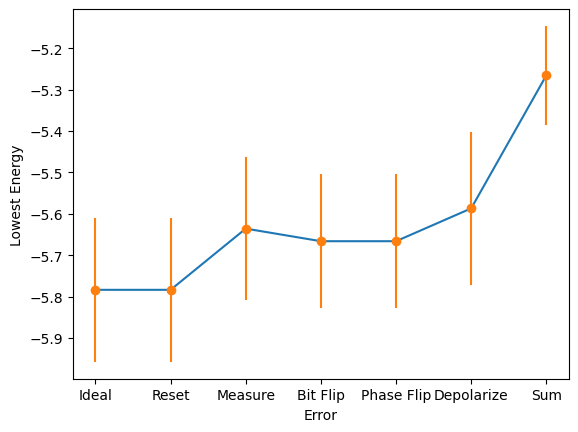

In [ ]:
import matplotlib.pyplot as plt

x = ["Ideal", "Reset", "Measure", "Bit Flip", "Phase Flip", "Depolarize", "Sum"]
y = [mean_ideal, mean_rst, mean_measure, mean_bit, mean_phase, mean_depo, mean_all]
yerr = [2*np.sqrt(var_ideal), 2*np.sqrt(var_rst), 2*np.sqrt(var_measure), 2*np.sqrt(var_bit), 2*np.sqrt(var_phase), 2*np.sqrt(var_depo), 2*np.sqrt(var_all)]

plt.plot(x, y)
plt.errorbar(x, y, yerr=yerr, fmt ='o')
plt.xlabel('Error')
plt.ylabel('Lowest Energy')
plt.show()

In [ ]:
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.188232421875
       x: [ 4.611e-02  6.001e+00  6.747e+00  6.727e+00  4.257e+00
            5.256e+00  5.704e+00  2.286e+00  2.328e+00]
    nfev: 122
   maxcv: 0.0

# VQE in IBM Hardware (IBM CUSCO)

use parameter optimized in Noiseless Simulator & just conduct measurement for 10 times

## optimization_level = 3 resilence_level = 0

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

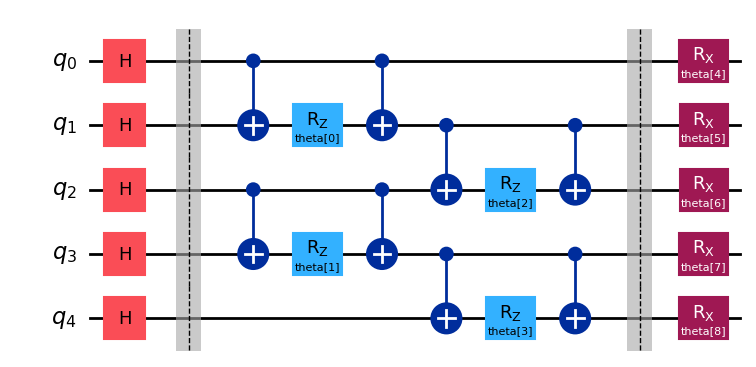

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibmq_cusco")
print(backend)

<IBMBackend('ibm_cairo')>


In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 0

estimator = Estimator(backend=backend, options=options)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192).result()
    return cost.values[0]

In [ ]:
x0 = np.array([-5.497e-01,  6.701e+00,  6.719e+00,  5.781e+00,  4.499e+00,  3.260e+00,  1.411e+00,  3.240e+00,  4.786e+00])
local_minimum_list = []

for _ in range(10):
  local_minimum_list.append(cost_func_vqe(x0, isa_circuit, isa_observable, estimator))

local_minimum_list = np.array(local_minimum_list)

KeyboardInterrupt: 

In [ ]:
local_minimum_list

## optimization_level = 3 resilence_level = 1

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibmq_cusco")
print(backend)

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 1

estimator = Estimator(backend=backend, options=options)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192).result()
    return cost.values[0]

In [ ]:
x0 = np.array([-5.497e-01,  6.701e+00,  6.719e+00,  5.781e+00,  4.499e+00,  3.260e+00,  1.411e+00,  3.240e+00,  4.786e+00])
local_minimum_list = []

for _ in range(10):
  local_minimum_list.append(cost_func_vqe(x0, isa_circuit, isa_observable, estimator))

local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## optimization_level = 3 resilence_level = 2

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibmq_cusco")
print(backend)

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 2

estimator = Estimator(backend=backend, options=options)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192).result()
    return cost.values[0]

In [ ]:
x0 = np.array([-5.497e-01,  6.701e+00,  6.719e+00,  5.781e+00,  4.499e+00,  3.260e+00,  1.411e+00,  3.240e+00,  4.786e+00])
local_minimum_list = []

for _ in range(10):
  local_minimum_list.append(cost_func_vqe(x0, isa_circuit, isa_observable, estimator))

local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## optimization_level = 3 resilence_level = 3

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# Ansatz

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)
ansatz.h(range(0,5))

ansatz.barrier()

ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.cx(1, 2)
ansatz.cx(3, 4)

ansatz.barrier()

ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)

ansatz.draw("mpl")

In [ ]:
service = QiskitRuntimeService()

backend = service.backend("ibmq_cusco")
print(backend)

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(ansatz)
isa_observable = hamiltonian.apply_layout(isa_circuit.layout)

options = Options()
options.optimization_level = 3
options.resilience_level = 3

estimator = Estimator(backend=backend, options=options)

In [ ]:
def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=8192).result()
    return cost.values[0]

In [ ]:
x0 = np.array([-5.497e-01,  6.701e+00,  6.719e+00,  5.781e+00,  4.499e+00,  3.260e+00,  1.411e+00,  3.240e+00,  4.786e+00])
local_minimum_list = []

for _ in range(10):
  local_minimum_list.append(cost_func_vqe(x0, isa_circuit, isa_observable, estimator))

local_minimum_list = np.array(local_minimum_list)

In [ ]:
local_minimum_list

## Optimized Lowest Energy

Optimization_level=3 & Resilence_level=0

[-5.06079102, -5.26391602, -5.17651367, -5.2253418 , -5.31274414, -5.31054688, -5.2878418 , -5.27050781, -5.28540039, -5.29614258]

Optimization_level=3 & Resilence_level=1

[-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458]

Optimization_level=3 & Resilence_level=2

[-5.69306641, -5.74666425, -5.69708356, -5.7189238 , -5.70712288, -5.67600891, -5.72470249, -5.74243537, -5.69886404, -5.62487282]

Optimization_level=3 & Resilence_level=3

[-6.22839352, -4.62640797, -6.19686491, -5.54156607, -5.65017652, -5.74497337, -6.03524048, -5.48405816, -5.61264108, -6.14861837]

In [ ]:
# When Optimization_level=3 & Resilence_level=0

local_minimum_list = np.array([-5.06079102, -5.26391602, -5.17651367, -5.2253418 , -5.31274414, -5.31054688, -5.2878418 , -5.27050781, -5.28540039, -5.29614258])

mean_0 = np.mean(local_minimum_list)
var_0 = np.var(local_minimum_list)
max_0 = np.max(local_minimum_list)
min_0 = np.min(local_minimum_list)

print("mean : {0}".format(mean_0))
print("variance : {0}".format(var_0))
print("maximum : {0}".format(max_0))
print("minimum : {0}".format(min_0))
print()
print(local_minimum_list)

mean : -5.2489746109999995
variance : 0.005482909620489517
maximum : -5.06079102
minimum : -5.31274414

[-5.06079102 -5.26391602 -5.17651367 -5.2253418  -5.31274414 -5.31054688
 -5.2878418  -5.27050781 -5.28540039 -5.29614258]


In [ ]:
# When Optimization_level=3 & Resilence_level=1

local_minimum_list = np.array([-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458])

mean_1 = np.mean(local_minimum_list)
var_1 = np.var(local_minimum_list)
max_1 = np.max(local_minimum_list)
min_1 = np.min(local_minimum_list)

print("mean : {0}".format(mean_1))
print("variance : {0}".format(var_1))
print("maximum : {0}".format(max_1))
print("minimum : {0}".format(min_1))
print()
print(local_minimum_list)

mean : -5.722296947
variance : 0.0014535559200360005
maximum : -5.64541463
minimum : -5.76632458

[-5.72749676 -5.72937777 -5.73962453 -5.7612482  -5.68476149 -5.6843978
 -5.64541463 -5.76621523 -5.71810848 -5.76632458]


In [ ]:
# When Optimization_level=3 & Resilence_level=2

local_minimum_list = np.array([-5.69306641, -5.74666425, -5.69708356, -5.7189238 , -5.70712288, -5.67600891, -5.72470249, -5.74243537, -5.69886404, -5.62487282])

mean_2 = np.mean(local_minimum_list)
var_2 = np.var(local_minimum_list)
max_2 = np.max(local_minimum_list)
min_2 = np.min(local_minimum_list)

print("mean : {0}".format(mean_2))
print("variance : {0}".format(var_2))
print("maximum : {0}".format(max_2))
print("minimum : {0}".format(min_2))
print()
print(local_minimum_list)

mean : -5.702974453000001
variance : 0.001118643405856558
maximum : -5.62487282
minimum : -5.74666425

[-5.69306641 -5.74666425 -5.69708356 -5.7189238  -5.70712288 -5.67600891
 -5.72470249 -5.74243537 -5.69886404 -5.62487282]


In [ ]:
# When Optimization_level=3 & Resilence_level=3

local_minimum_list = np.array([-6.22839352, -4.62640797, -6.19686491, -5.54156607, -5.65017652, -5.74497337, -6.03524048, -5.48405816, -5.61264108, -6.14861837])

mean_3 = np.mean(local_minimum_list)
var_3 = np.var(local_minimum_list)
max_3 = np.max(local_minimum_list)
min_3 = np.min(local_minimum_list)

print("mean : {0}".format(mean_3))
print("variance : {0}".format(var_3))
print("maximum : {0}".format(max_3))
print("minimum : {0}".format(min_3))
print()
print(local_minimum_list)

mean : -5.726894045
variance : 0.20689547749241513
maximum : -4.62640797
minimum : -6.22839352

[-6.22839352 -4.62640797 -6.19686491 -5.54156607 -5.65017652 -5.74497337
 -6.03524048 -5.48405816 -5.61264108 -6.14861837]


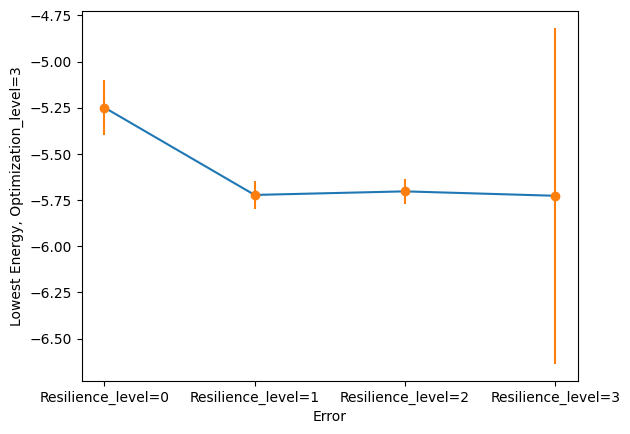

In [ ]:
import matplotlib.pyplot as plt

x = ["Resilience_level=0", "Resilience_level=1", "Resilience_level=2", "Resilience_level=3"]
y = [mean_0,mean_1,mean_2,mean_3]
yerr = [2*np.sqrt(var_0), 2*np.sqrt(var_1), 2*np.sqrt(var_2), 2*np.sqrt(var_3)]

plt.plot(x, y)
plt.errorbar(x, y, yerr=yerr, fmt ='o')
plt.xlabel('Error')
plt.ylabel('Lowest Energy, Optimization_level=3')
plt.show()

# VQE Data & Figure

IBM CUSCO (resilience_level=2&3) will be dropped off because Sampler has only resilience_level=0&1.

In [ ]:
import numpy as np

vqe_noiseless = np.array([-5.82879886, -5.89649831, -5.89460313, -5.87216999, -5.89714665, -5.8970116, -5.82318112, -5.88723766, -5.87906279, -5.89633351, -5.89712631, -5.89706667, -5.89640049, -5.89686096, -5.84344741, -5.89722894, -5.89514208, -5.89722285, -5.89281514, -5.8954058 , -5.89660128, -5.89722463, -5.8262015 , -5.89560605, -5.83363386, -5.87957003, -5.82656423, -5.89196626, -5.82341307, -5.8972198 , -5.82579769, -5.89274968, -5.89058962, -5.89571965, -5.89121954, -5.89066143, -5.89556185, -5.8294686 , -5.89500158, -5.88381387, -5.89720651, -5.86661138, -5.89703354, -5.8971071 , -5.89488588, -5.88977925, -5.89321505, -5.89655454, -5.89722776, -5.89703659, -5.8961525 , -5.89248345, -5.89678098, -5.89358845, -5.82619791, -5.88964449, -5.89599961, -5.89636862, -5.87624267, -5.89717557, -5.89514411, -5.83231881, -5.89722489, -5.89417956, -5.86522879, -5.89603463, -5.82299708, -5.89690459, -5.89513546, -5.88945447, -5.89701515, -5.89144585, -5.89279627, -5.89577581, -5.836521 , -5.88388422, -5.89711739, -5.84467668, -5.89351984, -5.89512836, -5.89677164, -5.87800257, -5.88000114, -5.83970428, -5.88410124, -5.86785946, -5.8962536 , -5.89717338, -5.84988649, -5.892418 , -5.88143104, -5.89473968, -5.89702307, -5.85915542, -5.89705331, -5.89717653, -5.89196071, -5.89641764, -5.88954192, -5.89643247])

vqe_bitflip_1 = np.array([-5.606, -5.71875, -5.60175, -5.698, -5.78125, -5.767, -5.5845, -5.645, -5.69425, -5.51475, -5.56775, -5.75575, -5.769, -5.57125, -5.64275, -5.74275, -5.5175, -5.7255, -5.666, -5.73625, -5.723, -5.7545, -5.6705, -5.60075, -5.52975, -5.6935, -5.61425, -5.6985, -5.69325, -5.6845, -5.73225, -5.72175, -5.6815, -5.31325, -5.7015, -5.70625, -5.68925, -5.738, -5.71325, -5.672, -5.66375, -5.618, -5.6725, -5.6015, -5.615, -5.7535, -5.52925, -5.767, -5.736, -5.7325, -5.647, -5.6445, -5.72275, -5.55, -5.67225, -5.68075, -5.7195, -5.6425, -5.7215, -5.60475, -5.72025, -5.709, -5.58275, -5.7115, -5.7125, -5.6935, -5.6955, -5.53825, -5.53225, -5.52125, -5.64025, -5.644, -5.7355, -5.6575, -5.6785, -5.56625, -5.762, -5.6985, -5.697, -5.63975, -5.61525, -5.68075, -5.76425, -5.7605, -5.699, -5.57325, -5.707, -5.57125, -5.74275, -5.68675, -5.4285, -5.7675, -5.76325, -5.6595, -5.71025, -5.66375, -5.6435, -5.726, -5.67075, -5.62425])

vqe_depolarization_1 = np.array([-5.464, -5.5505, -5.50125, -5.64825, -5.70225, -5.70025, -5.43825, -5.57275, -5.4745, -5.6055, -5.66075, -5.692, -5.68175, -5.47775, -5.317, -5.67375, -5.529, -5.657, -5.55025, -5.46625, -5.69025, -5.67975, -5.631, -5.4515, -5.412, -5.6265, -5.53575, -5.43025, -5.5855, -5.4955, -5.6855, -5.6505, -5.672, -5.35175, -5.65225, -5.65475, -5.4135, -5.56525, -5.438, -5.6115, -5.5225, -5.52325, -5.55525, -5.501, -5.3635, -5.70075, -5.649, -5.7025, -5.4855, -5.625, -5.6135, -5.633, -5.43725, -5.46675, -5.6255, -5.704, -5.432, -5.55775, -5.686, -5.511, -5.4655, -5.68625, -5.5895, -5.5275, -5.5875, -5.432, -5.30525, -5.475, -5.6845, -5.6685, -5.56775, -5.686, -5.502, -5.615, -5.6445, -5.5425, -5.67275, -5.57275, -5.614, -5.57625, -5.68275, -5.572, -5.68975, -5.66025, -5.5175, -5.597, -5.653, -5.49375, -5.71, -5.3725, -5.61425, -5.67175, -5.671, -5.55375, -5.63675, -5.5605, -5.66775, -5.65575, -5.62475, -5.5515 ])

vqe_cusco_0 = np.array([-5.06079102, -5.26391602, -5.17651367, -5.2253418 , -5.31274414, -5.31054688, -5.2878418 , -5.27050781, -5.28540039, -5.29614258])

vqe_cusco_1 = np.array([-5.72749676, -5.72937777, -5.73962453, -5.7612482 , -5.68476149, -5.6843978 , -5.64541463, -5.76621523, -5.71810848, -5.76632458])

vqe_cusco_2 = np.array([-5.69306641, -5.74666425, -5.69708356, -5.7189238 , -5.70712288, -5.67600891, -5.72470249, -5.74243537, -5.69886404, -5.62487282])

vqe_cusco_3 = np.array([-6.22839352, -4.62640797, -6.19686491, -5.54156607, -5.65017652, -5.74497337, -6.03524048, -5.48405816, -5.61264108, -6.14861837])


print("vqe_noiseless")
print("mean : {0}".format(np.mean(vqe_noiseless)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_noiseless))))
print("maximum : {0}".format(np.max(vqe_noiseless)))
print("minimum : {0}".format(np.min(vqe_noiseless)))
print()
print()


print("vqe_bitflip_1")
print("mean : {0}".format(np.mean(vqe_bitflip_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_bitflip_1))))
print("maximum : {0}".format(np.max(vqe_bitflip_1)))
print("minimum : {0}".format(np.min(vqe_bitflip_1)))
print()
print()


print("vqe_depolarization_1")
print("mean : {0}".format(np.mean(vqe_depolarization_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_depolarization_1))))
print("maximum : {0}".format(np.max(vqe_depolarization_1)))
print("minimum : {0}".format(np.min(vqe_depolarization_1)))
print()
print()


print("vqe_cusco_0")
print("mean : {0}".format(np.mean(vqe_cusco_0)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_0))))
print("maximum : {0}".format(np.max(vqe_cusco_0)))
print("minimum : {0}".format(np.min(vqe_cusco_0)))
print()
print()


print("vqe_cusco_1")
print("mean : {0}".format(np.mean(vqe_cusco_1)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_1))))
print("maximum : {0}".format(np.max(vqe_cusco_1)))
print("minimum : {0}".format(np.min(vqe_cusco_1)))
print()
print()


print("vqe_cusco_2")
print("mean : {0}".format(np.mean(vqe_cusco_2)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_2))))
print("maximum : {0}".format(np.max(vqe_cusco_2)))
print("minimum : {0}".format(np.min(vqe_cusco_2)))
print()
print()


print("vqe_cusco_3")
print("mean : {0}".format(np.mean(vqe_cusco_3)))
print("stdev : {0}".format(np.sqrt(np.var(vqe_cusco_3))))
print("maximum : {0}".format(np.max(vqe_cusco_3)))
print("minimum : {0}".format(np.min(vqe_cusco_3)))
print()
print()

vqe_noiseless
mean : -5.8822224289000005
stdev : 0.023394008024182674
maximum : -5.82299708
minimum : -5.89722894


vqe_bitflip_1
mean : -5.665257499999999
stdev : 0.07990144284523278
maximum : -5.31325
minimum : -5.78125


vqe_depolarization_1
mean : -5.5746225
stdev : 0.09975300430939411
maximum : -5.30525
minimum : -5.71


vqe_cusco_0
mean : -5.2489746109999995
stdev : 0.07404667190690961
maximum : -5.06079102
minimum : -5.31274414


vqe_cusco_1
mean : -5.722296947
stdev : 0.038125528455826035
maximum : -5.64541463
minimum : -5.76632458


vqe_cusco_2
mean : -5.702974453000001
stdev : 0.0334461269186218
maximum : -5.62487282
minimum : -5.74666425


vqe_cusco_3
mean : -5.726894045
stdev : 0.45485764530500655
maximum : -4.62640797
minimum : -6.22839352




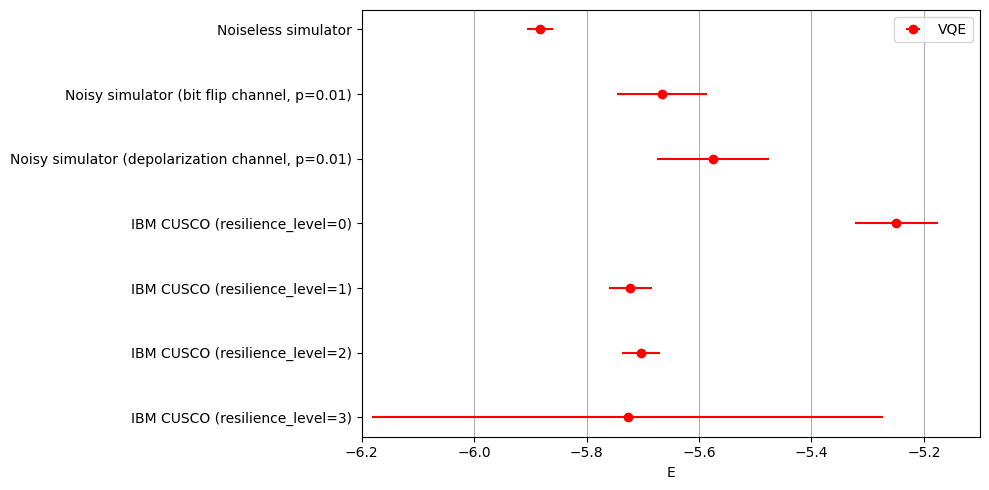

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data to mimic the plot
# Assuming there are two energy levels for each of the three categories
categories = ['Noiseless simulator', 'Noisy simulator (bit flip channel, p=0.01)', 'Noisy simulator (depolarization channel, p=0.01)',
              'IBM CUSCO (resilience_level=0)', 'IBM CUSCO (resilience_level=1)', 'IBM CUSCO (resilience_level=2)', 'IBM CUSCO (resilience_level=3)']
methods = ['VQE']
energies = {
    'Noiseless simulator':                                {'VQE': (np.mean(vqe_noiseless), np.sqrt(np.var(vqe_noiseless)))},
    'Noisy simulator (bit flip channel, p=0.01)':         {'VQE': (np.mean(vqe_bitflip_1), np.sqrt(np.var(vqe_bitflip_1)))},
    'Noisy simulator (depolarization channel, p=0.01)':   {'VQE': (np.mean(vqe_depolarization_1), np.sqrt(np.var(vqe_depolarization_1)))},
    'IBM CUSCO (resilience_level=0)':                     {'VQE': (np.mean(vqe_cusco_0), np.sqrt(np.var(vqe_cusco_0)))},
    'IBM CUSCO (resilience_level=1)':                     {'VQE': (np.mean(vqe_cusco_1), np.sqrt(np.var(vqe_cusco_1)))},
    'IBM CUSCO (resilience_level=2)':                     {'VQE': (np.mean(vqe_cusco_2), np.sqrt(np.var(vqe_cusco_2)))},
    'IBM CUSCO (resilience_level=3)':                     {'VQE': (np.mean(vqe_cusco_3), np.sqrt(np.var(vqe_cusco_3)))},
}

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the data
for i, category in enumerate(categories):
    for j, method in enumerate(methods):
        mean, error = energies[category][method]
        marker = 'o' if method == 'VQE' else '^'
        color = 'red' if method == 'VQE' else 'blue'
        ax.errorbar(mean, i, xerr=error, fmt=marker, color=color, label=method if i == 0 else "")

# Customizing the plot
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.invert_yaxis()  # Invert y-axis to match the uploaded image
ax.set_xlabel('E')
ax.xaxis.grid(True)  # Add a grid on x-axis
ax.set_xlim(-6.20, -5.10)  # Set the limit for x-axis to match the uploaded image

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()